#### For the whole structure of files please read EDA _2_README_Introduction_1.ipynb
#### Graphical exploration hypthese 2: The year the house was constructed has an influence on the selling price.
 ##### Additional variables are created or renamed and some graphical explorations are performed


##### Getting data and settings
###### Getting setting stored in 0_definitions.py file

In [2]:
# definitions
with open("0_definitions.py") as file:
    exec(file.read())

##### Getting data stored at the end of EDA _4_cleaning.ipynb

In [3]:
df_eda = pd.read_csv("eda4.csv",)
df_eda = df_eda.drop(df_eda.columns[0], axis=1)
df_eda.head() 

,date_sold,price,house_id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Bedrooms per 100 sqm (Living Area),Bedrooms per 100 sqm (Lot Area),bedrooms_100
0,2014-12-09,5.380,6414100192,2,3,2,2570.0,7242.0,2,0,...,1951.0,19910.0,98125,47.7210,-122.319,1690.0,7639.0,1.256488,0.007230,Low (1-2)
1,2014-12-09,6.040,2487200875,4,4,3,1960.0,5000.0,1,0,...,1965.0,0.0,98136,47.5208,-122.393,1360.0,5000.0,2.196717,0.014220,Medium (2-3)
2,2015-02-18,5.100,1954400510,5,3,2,1680.0,8080.0,1,0,...,1987.0,0.0,98074,47.6168,-122.045,1800.0,7503.0,1.922128,0.011060,Medium (2-3)
3,2014-05-12,12.300,7237550310,6,4,4,5420.0,101930.0,1,0,...,2001.0,0.0,98053,47.6561,-122.005,4760.0,101930.0,0.794385,0.006856,Low (1-2)
4,2015-04-15,2.295,2414600126,9,3,1,1780.0,7470.0,1,0,...,1960.0,0.0,98146,47.5123,-122.337,1780.0,8113.0,1.814143,0.005219,Medium (2-3)


##### Some extra variables for EDA

##### changing data format and building time between house being sold and constructed
##### difference of house construction/renovation and selling

In [4]:
df_eda.info() 
df_eda["date_sold"] = pd.to_datetime(df_eda["date_sold"])
df_eda["yr_sold"]=df_eda["date_sold"].dt.year
# Difference
df_eda["sold_build_difference"]=(df_eda["yr_sold"]-df_eda["yr_built"]) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15413 entries, 0 to 15412
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   date_sold                           15413 non-null  object 
 1   price                               15413 non-null  float64
 2   house_id                            15413 non-null  int64  
 3   id                                  15413 non-null  int64  
 4   bedrooms                            15413 non-null  int64  
 5   bathrooms                           15413 non-null  int64  
 6   sqft_living                         15413 non-null  float64
 7   sqft_lot                            15413 non-null  float64
 8   floors                              15413 non-null  int64  
 9   waterfront                          15413 non-null  int64  
 10  view                                15413 non-null  int64  
 11  condition                           15413

##### Checking for correlation between year sold year constructed and their difference 

Text(95.7222222222222, 0.5, 'Features')

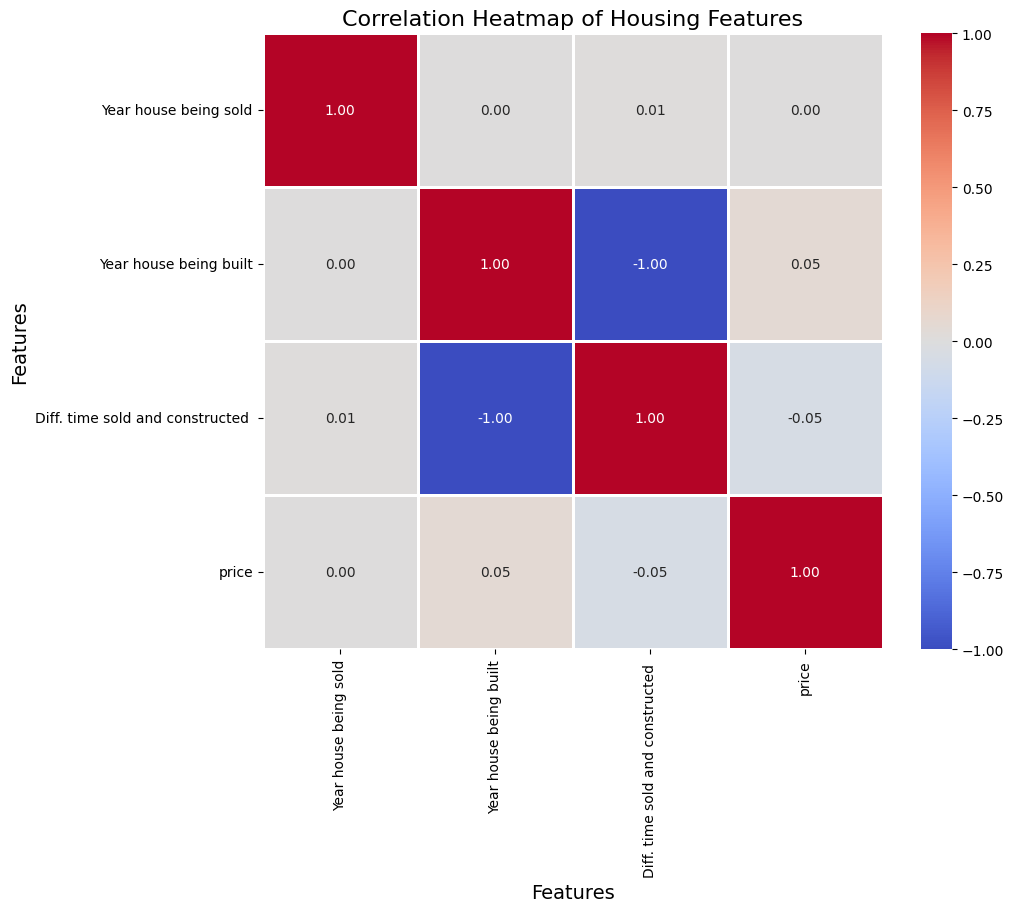

In [5]:
new_column_names = {
    'yr_sold': 'Year house being sold',
    'yr_built': 'Year house being built',
    'sold_build_difference': 'Diff. time sold and constructed ',
    'price': 'price'
}

# Rename columns in the DataFrame
df_eda.rename(columns=new_column_names, inplace=True)

# Define the list of columns for correlation
num_question = list(new_column_names.values())  # Use the new column names

# Plotting the heatmap
plt.figure(figsize=(10, 8), dpi=100)
heatmap = sns.heatmap(
    data=df_eda[num_question].corr(),  # Compute correlation matrix for specified columns
    cmap='coolwarm',                  # Color map
    linecolor='white',                # Color of lines that separate cells
    linewidth=1,                      # Width of lines that separate cells
    annot=True,                       # Annotate cells with correlation coefficients
    vmin=-1,                          # Minimum value of the color scale
    vmax=1,                           # Maximum value of the color scale
    fmt='.2f'                         # Format annotations to 2 decimal places
)

# Adding labels and title
plt.title('Correlation Heatmap of Housing Features', fontsize=16)  # Title with larger font size
plt.xlabel('Features', fontsize=14)            # X-axis label with larger font size
plt.ylabel('Features', fontsize=14)            # Y-axis label with larger font size

In [6]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15413 entries, 0 to 15412
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   date_sold                           15413 non-null  datetime64[ns]
 1   price                               15413 non-null  float64       
 2   house_id                            15413 non-null  int64         
 3   id                                  15413 non-null  int64         
 4   bedrooms                            15413 non-null  int64         
 5   bathrooms                           15413 non-null  int64         
 6   sqft_living                         15413 non-null  float64       
 7   sqft_lot                            15413 non-null  float64       
 8   floors                              15413 non-null  int64         
 9   waterfront                          15413 non-null  int64         
 10  view                  

##### keeping only rows when the house was not renovated (=yr_renovated)

In [7]:
# Number of rows before filtering
rows_before = len(df_eda)
df_eda = df_eda[df_eda['yr_renovated'] == 0]
# Number of rows after filtering
rows_after = len(df_eda)
rows_dropped = rows_before - rows_after 
rows_dropped 


632

Text(95.7222222222222, 0.5, 'Features')

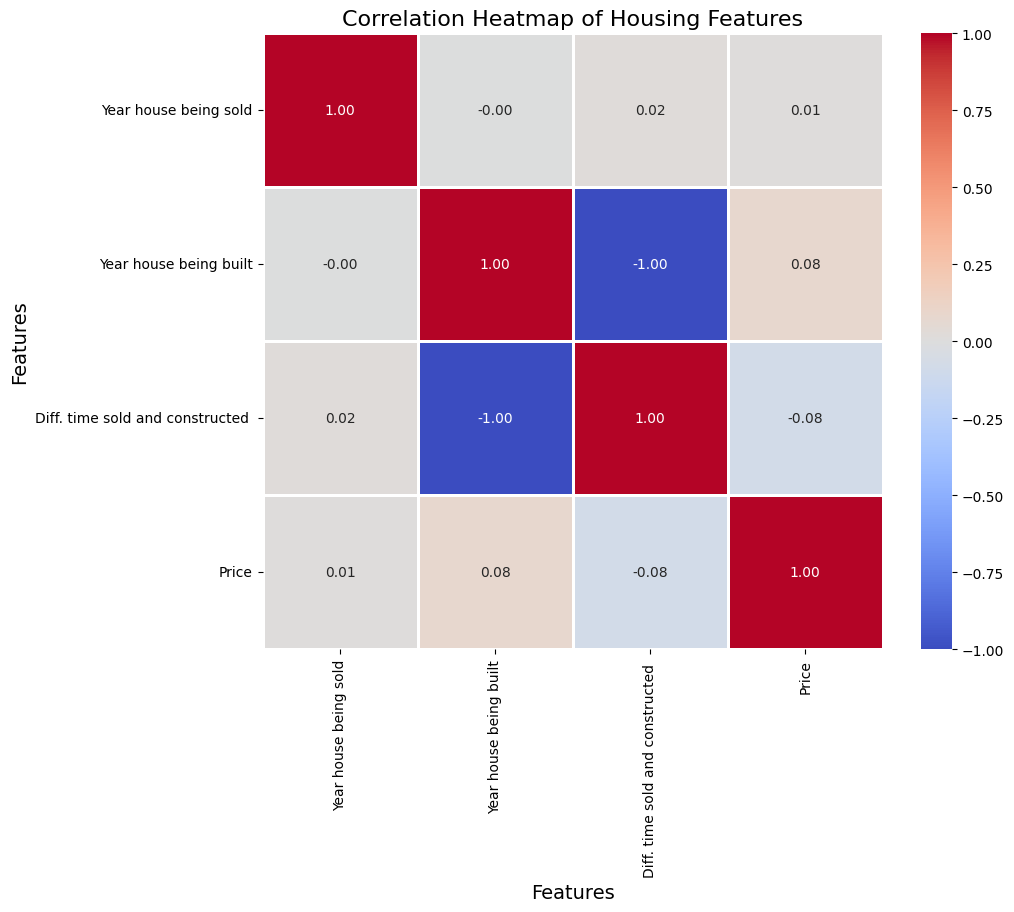

In [9]:
new_column_names = {
    'yr_sold': 'Year house being sold',
    'yr_built': 'Year house being built',
    'sold_build_difference': 'Diff. time sold and constructed ',
    'price': 'Price'
}

# Rename columns in the DataFrame
df_eda.rename(columns=new_column_names, inplace=True)

# Define the list of columns for correlation
num_question = list(new_column_names.values())  # Use the new column names

# Plotting the heatmap
plt.figure(figsize=(10, 8), dpi=100)
heatmap = sns.heatmap(
    data=df_eda[num_question].corr(),  # Compute correlation matrix for specified columns
    cmap='coolwarm',                  # Color map
    linecolor='white',                # Color of lines that separate cells
    linewidth=1,                      # Width of lines that separate cells
    annot=True,                       # Annotate cells with correlation coefficients
    vmin=-1,                          # Minimum value of the color scale
    vmax=1,                           # Maximum value of the color scale
    fmt='.2f'                         # Format annotations to 2 decimal places
)

# Adding labels and title
plt.title('Correlation Heatmap of Housing Features', fontsize=16)  # Title with larger font size
plt.xlabel('Features', fontsize=14)            # X-axis label with larger font size
plt.ylabel('Features', fontsize=14)            # Y-axis label with larger font size

In [ ]:
df_eda['Year house being built'].describe()

In [ ]:
### Check of linearity 
# Define bins and labels
bins = [1900, 1930, 1960, 1990, 2020]
labels = ['Between. 1900-1930', '1931-1960', '1961-1990', '1900-2015']
# Apply pd.cut to bin the data
df_eda['Year of counstruction'] = pd.cut(df_eda['Year house being built'], bins=bins, labels=labels)
# Display the DataFrame with the new binned column
df_eda.head()

In [ ]:
plt.figure(figsize=(10, 8), dpi=100)
sns.boxplot(
    x='Year of counstruction',  # Binned categories
    y='Price',                # Variable to plot
    data=df_eda,              # Data source
    palette='coolwarm'        # Color palette for the boxplot
)

# Adding labels and title
plt.title('Price Distribution by construction', fontsize=16)  # Title with larger font size
plt.xlabel('Year house being built', fontsize=14)              # X-axis label
plt.ylabel('Price in 100000', fontsize=14)                                       # Y-axis label

plt.ylim(0, 10) 
plt.show()  # Display the boxplot

### Plotting for price and living area by year being build

In [ ]:
df_eda.info()

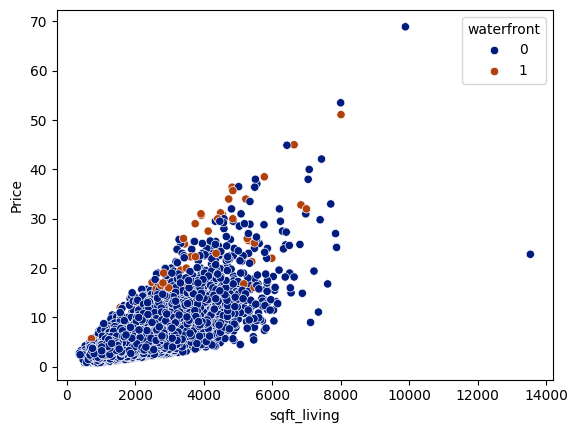

In [169]:

sns.scatterplot(data=df_eda, x='sqft_living', y='Price', 
                    hue='waterfront', palette='dark');

#### Saving data for next steps

In [ ]:
df_eda.to_csv("eda5.csv")
df_eda.head()